In [1]:
%pylab inline
from ipywidgets import interact, interact_manual
set_printoptions(suppress=True)

Populating the interactive namespace from numpy and matplotlib


# Операции с матрицами

Загрузим координаты изображения из текстового файла, в котором записаны две колонки чисел.

Откуда взялись числа и почему файл называется `los` см. в задаче [Task_dataset_los](Task_dataset_los.ipynb)

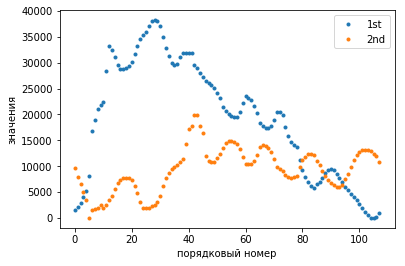

In [2]:
los=loadtxt('los.csv', skiprows=1) # параметр skiprows для пропуска заголовков

plot(los,'.'); legend(('1st','2nd')); ylabel('значения'); xlabel('порядковый номер');

In [5]:
d = los

Две колонки чисел - это координаты, поэтому отобразим расположение отдельных значений на пересечении этих координат.

Следующая ячейка выдаст ошибку, поскольку переменной `d` не определено. Уже есть переменая с загруженными данными. Мы хотим обращаться к этим же данным, но использовать короткое имя для переменной, потому что будем многократно писать его в выражениях. Исправьте ошибку, отредактировав предыдущую ячейку (нужно задать переменную `d` как копию уже имеющейся, фактически новых данных при этом не создается - создается еще одна ссылка с новым именем на тот же адрес в памяти)

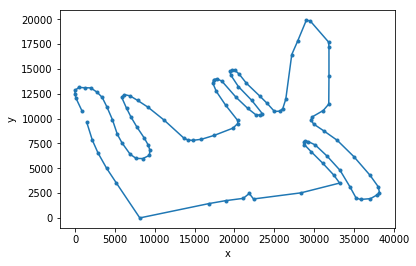

In [6]:
x=d[:,0];
y=d[:,1];
plot(x,y,'.-'); xlabel('x'); ylabel('y');

Допустим, что исходные значения в `мм`. Чтобы перевести в `м`, разделим на 1000, или что то же самое - умножим на 0.001 .

Ясно, что если переводе `мм` в `м` - картинка не меняется. Меняется лишь шкала по осям координат.

Здесь и далее будем задавать одинаковые размеры по осям координат, чтобы имитировать расположение точек на реальной плоскости.

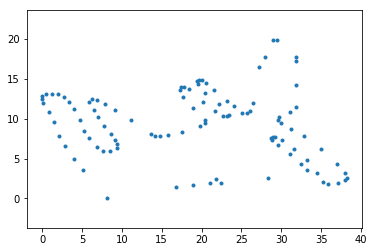

In [7]:
d = d*[0.001]
x=d[:,0]; y=d[:,1]; plot(x,y,'.'); axis('equal');

Если мы умножим матрицу на массив (вектор) из двух чисел, то каждая из колонок умножится на свое число. Например, мы можем "сжимать" данные вдоль одной оси, не трогая при этом вторую.

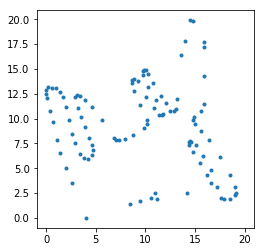

In [8]:
d_ = d*([.5, 1.0])

x=d_[:,0]; y=d_[:,1]; plot(x,y,'.'); axis('square');

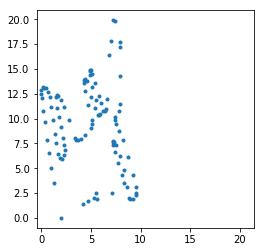

In [9]:
d_ = d*([.25, 1.0])
x=d_[:,0]; y=d_[:,1]; plot(x,y,'.'); axis('square');

Попробуйте эффект от шкалирования в стационарных координатах.

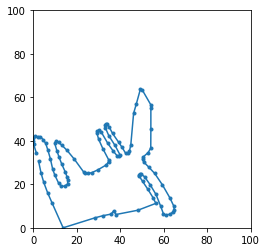

In [10]:
@interact(k1=(.2,5,.1), k2=(.2,5,.1))
def _scale(k1=1.0, k2=1.0):
    d_ = d*([k1, k2])
    x=d_[:,0]; y=d_[:,1]; 
    plot(x,y,'.-'); axis('square');xlim(0,100);ylim(0,100);

Должно быть ясно, что для получения определенной пропорции достаточно изменить один из коэффициентов.

Согласованное изменение коэффициентов равнозначно изменению единиц шкалы без изменения пропорций.
Например, если размеры в см разделить примерно на 4, то получим размеры в дюймах.

## Перемножение матриц

Главная операция линейной алгебры. Обозначается точкой. Функция называется `dot()`.

$$ A \cdot B = С $$

Процедура - результаты умножения каждой колонки из $A$ на коэффициент из каждой колонки $B$ суммируются с получением колонки в итоговой матрице $C$. Получается, что первая строчка $B$ определяет вклад иксов в итоговые колонки, а вторая строчка - вклад игреков.

Суть - мы можем смешивать вклад обеих колонок в разных пропорциях. Если вклад одной из колонок нам не нужен - мы его обнуляем (перемножаем на 0).


[[ 1.8  0.9]
 [-0.8  2. ]]


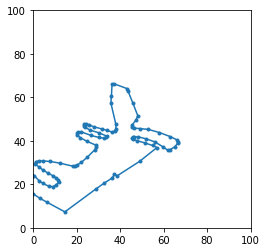

In [11]:
@interact(k1=(.2,5,.1), k2=(.2,5,.1), k3=(-1,1,.1), k4=(-1,1,.1))
def _scale(k1=2.0, k2=3.0, k3=0, k4=0):
    R=array([[k1, k4], [k3, k2]])
    print(R)
    d_ = d.dot(R)
    x=d_[:,0]; y=d_[:,1]; 
    plot(x,y,'.-'); axis('square');xlim(0,100);ylim(0,100);
    

Коэффициенты по диагонали (k1, k2) ведут себя точно также, как отдельные множители для каждой из колонок в предыдущих примерах. 

Если менять коэффициенты k3 или k4 , то рисунок наклоняется. 
А если их изменять в противоположных направлениях - рисунок вращается!!!

Чтобы понять, что происходит, вспомним тригонометрию...
При вращении (движении точки по окружности) изменяется один параметр - угол $\alpha$. А координаты точки при этом равны $sin(\alpha)$ и $cos(\alpha)$.

Например, чтобы повернуть все точки матрицы на 90 градусов (в радианах $\frac{\pi}{2}$), надо 
от $x$ отнять $cos(0)$ и прибавить $cos(\frac{\pi}{2})$ (из 1 сделать 0), 
а из $y$ отнять $sin(0)$ и прибавить $sin(\frac{\pi}{2})$ (из 0 сделать 1).

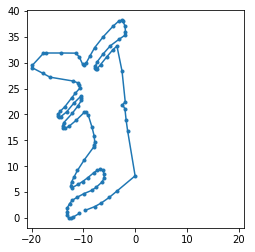

In [12]:
alpha = pi/2
d_ = d.dot([[cos(alpha), sin(alpha)], 
            [-sin(alpha), cos(alpha)]])
x=d_[:,0]; y=d_[:,1]; plot(x,y,'.-'); axis('square');

[[-0.8660254  0.5      ]
 [-0.5       -0.8660254]]


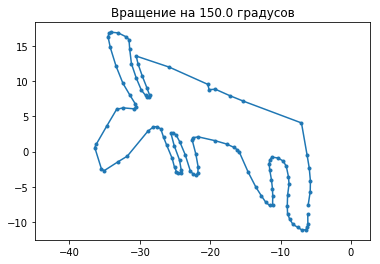

In [13]:
@interact(alpha=(-180.,360.,5.))
def _scale(alpha=0):
    ro=deg2rad(alpha)
    R=array([[cos(ro), sin(ro)], 
            [-sin(ro), cos(ro)]])
    print(R)
    d_ = d.dot(R)
    x=d_[:,0]; y=d_[:,1]; 
    plot(x,y,'.-'); axis('equal');#xlim(0,100);ylim(0,100);
    title('Вращение на {} градусов'.format(alpha))
    

Обратите внимание на коэффициенты при 60, 45, 90, -90, 180, 360 градусах. Бегунок можно двигать стрелочками, если мышкой неудобно.

Вращение на 90 градусов фактически равно замене местами $x$ и $y$ и замене знака у $x$.

Если заменить координаты местами и не заменить знак, то будет "зеркальное" отображение исходной картинки относительно биссектрисы угла.

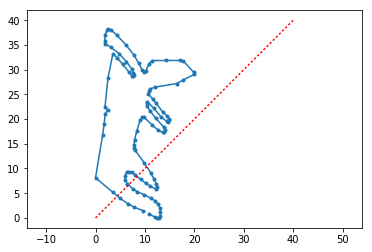

In [14]:
x=d[:,1]; y=d[:,0]; 
plot(x,y,'.-'); axis('equal');
plot([0,40], [0,40], 'r:');

Замена знака у $x$ и $y$ соответствует вращению вокруг начала координат на 180 градусов.

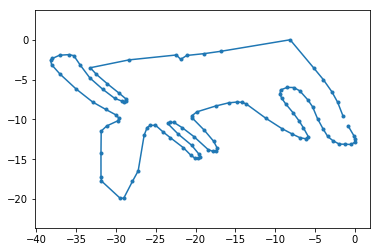

In [15]:
x=d[:,0]; y=d[:,1];
plot(-x,-y,'.-'); axis('equal');

Поправьте элементы матрицы вращения $R$ так, чтобы изображение лося было правдоподобным, таким, каким его видели жители Урала с вершины горы, когда создавали.

Критерий успеха: рога торчат вертикально, спина идет горизонтально.

[[-1.    0.5 ]
 [ 0.25 -1.  ]]


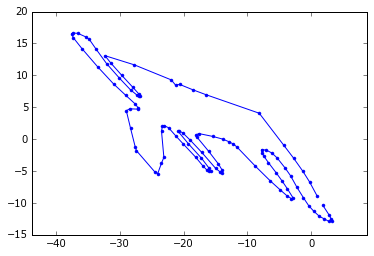

In [88]:
R=array([[-1, .5], 
         [.25, -1]])
d_ = d.dot(R)
x=d_[:,0]; y=d_[:,1]; plot(x,y,'.-'); axis('equal');
print(R)

Вывод: сочетание взаимных влияний двух показателей может оказывать эффекты вращения и наклона на паттерн расположения точек в пространстве.

При этом используются простые операции - умножения и сложения. Результат (повернутая матрица) - массив чисел той же размерности с сохраненным взаимным расположением точек.

Например, координаты точки из передней ноги в результате любых поворотов и искажений будут  находится в промежутке между координатами морды и задней ноги.

In [90]:
d.shape, d_.shape

((108, 2), (108, 2))